# D3 hetlthcare Data
Made by -
- Akshat Lakhara
- Anil Kumar Dhayal​​
- Deepshikha Kumari ​
- Disha Kamlesh Kumar Shah
​- Swaraj Haresh Purohit​
- Vidhi Sachin Thakare 

# Install and Import all the dependencies

In [1]:
# %pip install numpy
# %pip install rich
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy.stats
# %pip install scikit-learn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from rich import print

## Merging datasets to create a consolidated datafame
Reading data and using join method to create a consolidated datafame named ```merged_data```

In [2]:
filename="csv/Liver Patient Dataset.csv"
data= pd.read_csv(filename, encoding='unicode_escape')
data.set_index("ID")

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code
ID,,,,,,,,,,,,
ID_001,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15
ID_002,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11
ID_003,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28
ID_004,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27
ID_005,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24
...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11
ID_30674,45.0,Male,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15
ID_30675,60.0,Female,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24


In [3]:
state= pd.read_csv("csv/Statecode_name.csv")
status= pd.read_csv("csv/Status.csv")
city= pd.read_csv("csv/Cityname_statecode.csv")

In [4]:
state.rename(columns={"State Code":"State_Code"},inplace=True)
state=state.set_index("State_Code")
city.rename(columns={"City Code":"City_Code"},inplace=True)
city=city.set_index("City_Code")
status.replace(2, 0, inplace=True)

In [5]:
merge_data=pd.merge(data, state, on='State_Code', how='left')
merge_data=pd.merge(merge_data, city[["City name"]], on='City_Code', how='left')
merge_data=pd.merge(merge_data, status, on='ID', how='outer')

In [6]:
merge_data=merge_data.set_index("ID")
merge_data.loc[merge_data["Gender of the patient"]=="Female","Gender of the patient"]=1 
merge_data.loc[merge_data["Gender of the patient"]=="Male","Gender of the patient"]=0 

# Is the dataset balanced?

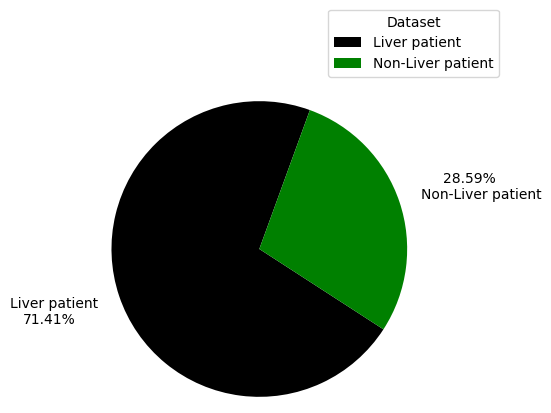

In [7]:
fig = plt.figure(figsize=(5,4))
plt.pie(merge_data['Status'].value_counts(),labels=['Liver patient','Non-Liver patient'],radius=1.2,
colors = ['black','green'],autopct='%1.2f%%',pctdistance=1.5 ,labeldistance=1.15,startangle =70)

plt.legend(title = 'Dataset',loc='upper right', bbox_to_anchor=(1.3,1.3))
plt.show()

In [8]:
numb_col=['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio','Status']

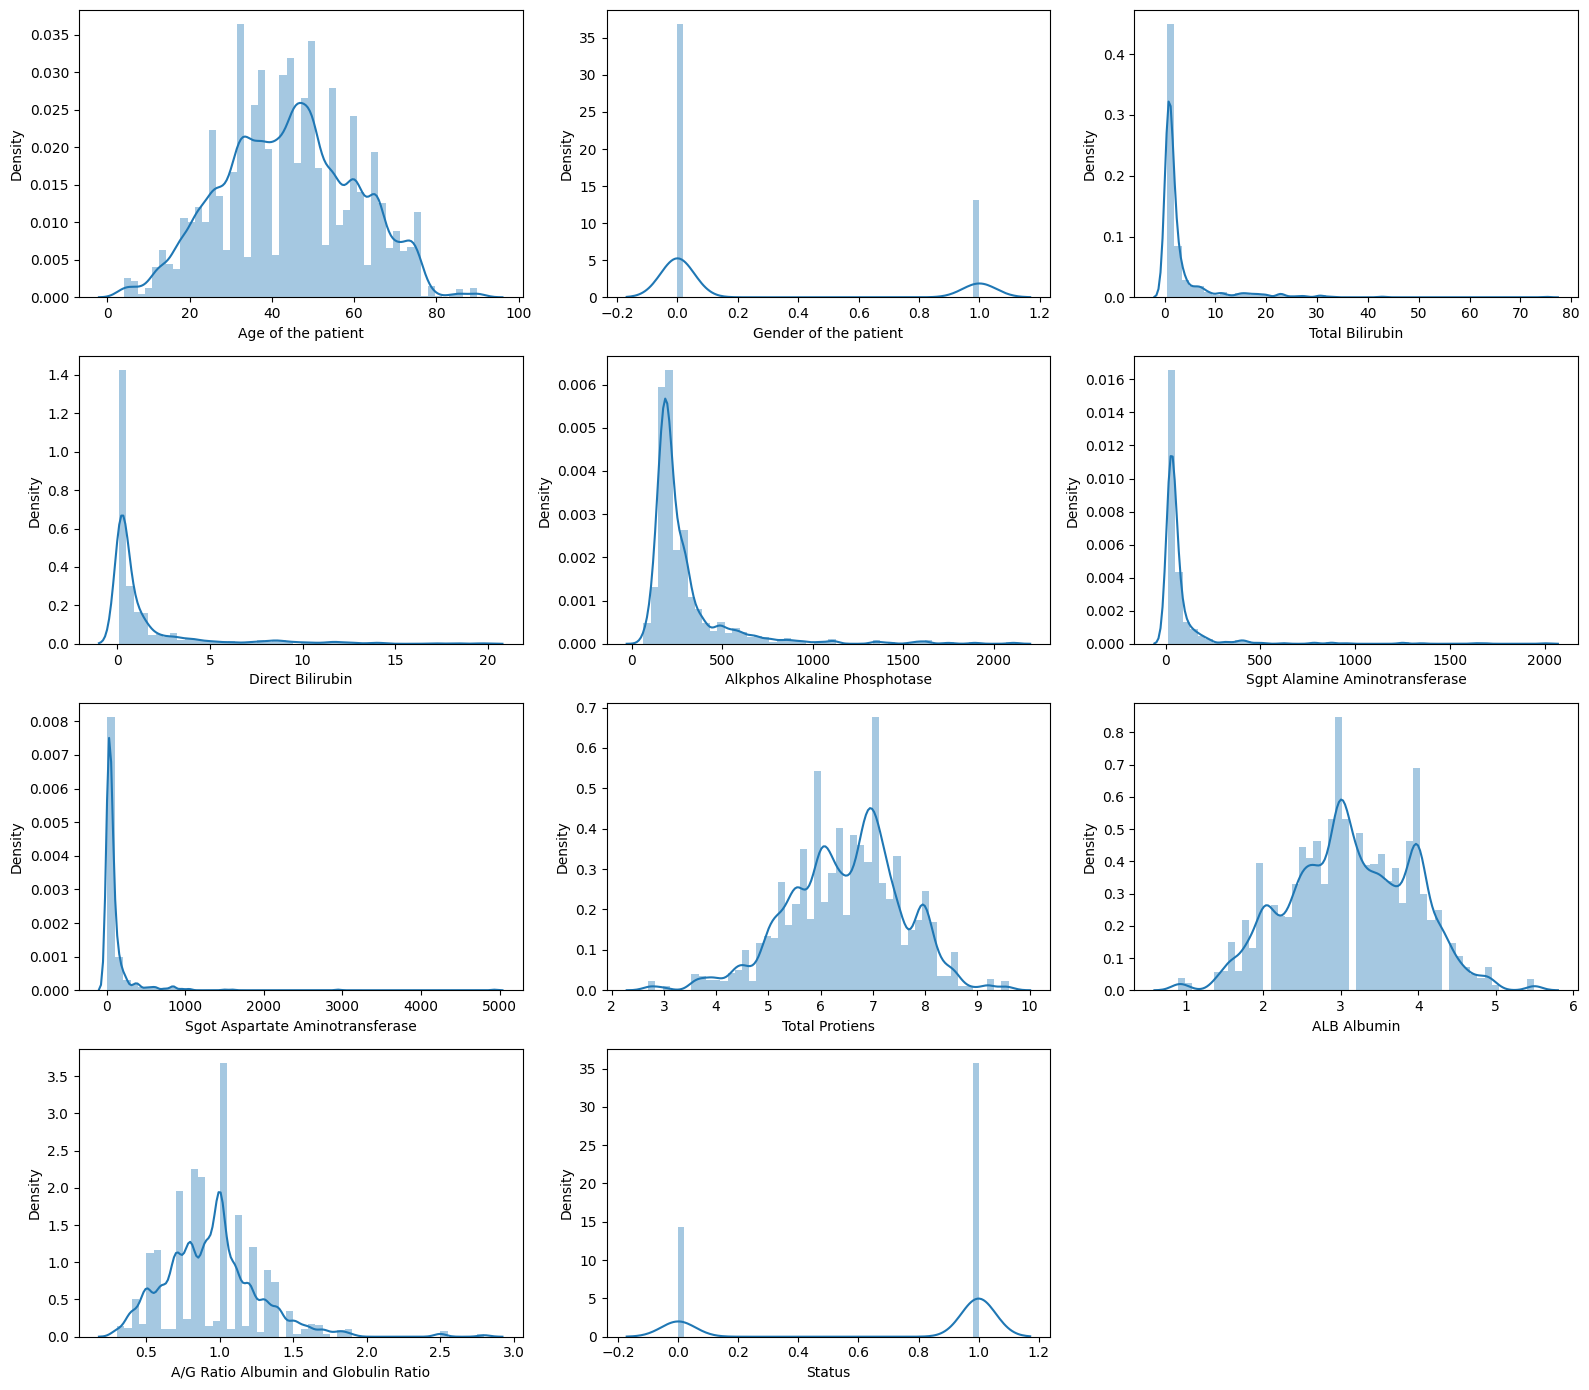

In [9]:
plt.figure(figsize=(16,14))
for i,col in enumerate(merge_data[numb_col].columns):
    plt.subplot(4,3,i+1)
    sns.distplot(a=merge_data[col],bins=50,hist=True)
    plt.tight_layout()

form the above plot we can infer that there are a lot of discrapnacies in the data and is not balanced

In [10]:
target_distribution = merge_data['Status'].value_counts()

# Check for missing values and duplicates
is_dataset_balanced = target_distribution.min() / target_distribution.max() > 0.8

print("Target Distribution: where 1 indicates Liver Patient, 0 indicates not Liver Patient")
print(target_distribution)

target_distribution = merge_data['Gender of the patient'].value_counts()

print("Target Distribution: where 1 indicates Female Patient, 0 indicates not Male Patient")
print(target_distribution)


# Check for missing values and duplicates
is_dataset_balanced = target_distribution.min() / target_distribution.max() > 0.8


print("\nIs the dataset balanced?", is_dataset_balanced)


Target Distribution: where 1 indicates Liver Patient, 0 indicates not Liver Patient

Status
1    21907
0     8770
Name: count, dtype: int64

Target Distribution: where 1 indicates Female Patient, 0 indicates not Male Patient

Gender of the patient
0    21977
1     7802
Name: count, dtype: int64

Is the dataset balanced? False

Status                                  1.000000
Direct Bilirubin                        0.249551
Total Bilirubin                         0.225086
Alkphos Alkaline Phosphotase            0.183398
Sgpt Alamine Aminotransferase           0.165859
ALB Albumin                             0.160396
Sgot Aspartate Aminotransferase         0.158648
A/G Ratio Albumin and Globulin Ratio    0.158379
Total Protiens                          0.030404
Age of the patient                      0.004812
Name: Status, dtype: float64

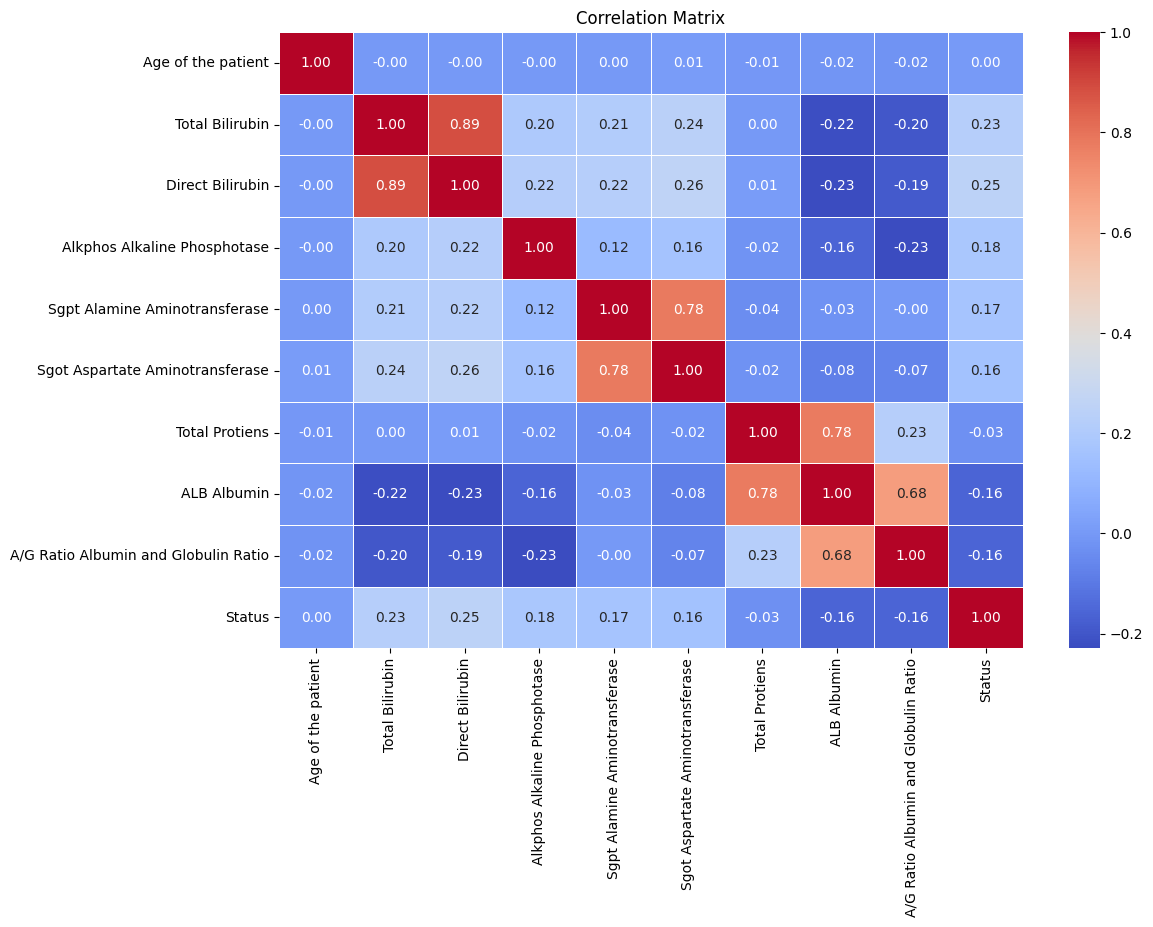

In [11]:
correlation_matrix = merge_data.corr(method='pearson',numeric_only=True)
liver_d_corr = correlation_matrix["Status"].abs().sort_values(ascending=False)

print(liver_d_corr)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True , cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

from this we can observe that ```Total Bilirubin``` and ```Total Bilirubin``` are highly correlated to each other and are the most dominat corr with status

# Any missing values?

using ```.isnull()``` function we calculate the number of 

In [12]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Age of the patient                        2
Gender of the patient                   898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
dtype: int64

In [13]:
has_missing_values = merge_data.isnull().values.any()
print("Any missing values?", has_missing_values)
merge_data.loc[merge_data.isnull().any(axis=1)==True]

Any missing values? True

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_007,26.0,1,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,CT06,ST22,Rajasthan,Jaipur,1
ID_013,64.0,0,0.9,NaN,NaN,61.0,58.0,7.0,3.4,0.90,CT04,ST24,Tamil Nadu,Coimbatore,0
ID_015,61.0,0,0.7,0.2,145.0,53.0,NaN,NaN,2.7,0.87,CT16,ST23,Sikkim,Gangtok,1
ID_022,51.0,0,2.9,1.3,482.0,22.0,NaN,7.0,2.4,0.50,CT22,ST14,Madhya Pradesh,Indore,1
ID_023,62.0,0,NaN,3.0,542.0,116.0,66.0,6.4,3.1,0.90,CT18,ST21,Punjab,Ludhiana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_9867,60.0,0,NaN,0.8,97.0,85.0,78.0,6.4,2.7,0.70,CT16,ST23,Sikkim,Gangtok,1
ID_9868,45.0,0,NaN,0.2,406.0,24.0,45.0,7.2,3.5,0.90,CT16,ST23,Sikkim,Gangtok,0
ID_9869,48.0,1,NaN,0.2,114.0,21.0,23.0,7.0,3.0,0.70,CT08,ST29,West Bengal,Kolkata,0


we can observe that there are a lot of missing values and with different distribution it is to keep in mind that we can use the reltions which we found above


using a reggresion model we can get data from another rows to get data which is not avaiable

In [14]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Age of the patient                        2
Gender of the patient                   898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
dtype: int64

In [15]:
# Fixing Missing Value
from sklearn.linear_model import LinearRegression
df_corr = merge_data.dropna(subset=["Total Bilirubin", "Direct Bilirubin"])

# Create input (x) and target (y) variables
x = df_corr[["Total Bilirubin"]]
y = df_corr["Direct Bilirubin"]

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

def impute_direct_bilirubin(row):
    if not pd.isnull(row["Direct Bilirubin"]):
        return row["Direct Bilirubin"]
    elif pd.isnull(row["Direct Bilirubin"]) and not pd.isnull(row["Total Bilirubin"]):
        return model.predict([[row["Total Bilirubin"]]])[0]
    else:
        return row["Direct Bilirubin"]

merge_data["Direct Bilirubin"] = merge_data.apply(impute_direct_bilirubin, axis=1)

df_corr = merge_data.dropna(subset=["Total Bilirubin", "Direct Bilirubin"])

x_reverse = df_corr[["Direct Bilirubin"]]
y_reverse = df_corr["Total Bilirubin"]


model_reverse = LinearRegression()
model_reverse.fit(x_reverse, y_reverse)

def impute_total_bilirubin(row):
    if not pd.isnull(row["Total Bilirubin"]):
        return row["Total Bilirubin"]
    elif pd.isnull(row["Total Bilirubin"]) and not pd.isnull(row["Direct Bilirubin"]):
        return model_reverse.predict([[row["Direct Bilirubin"]]])[0]
    else:
        return row["Total Bilirubin"]

merge_data["Total Bilirubin"] = merge_data.apply(impute_total_bilirubin, axis=1)


filling na values with the distribution they belong to

In [16]:
merge_data["Alkphos Alkaline Phosphotase"].fillna(merge_data["Alkphos Alkaline Phosphotase"].median(),inplace=True)
merge_data["Sgpt Alamine Aminotransferase"].fillna(merge_data["Sgpt Alamine Aminotransferase"].median(),inplace=True)
merge_data["Sgot Aspartate Aminotransferase"].fillna(merge_data["Sgot Aspartate Aminotransferase"].mean(),inplace=True)
merge_data["Total Protiens"].fillna(merge_data["Total Protiens"].mean(),inplace=True)
merge_data["ALB Albumin"].fillna(merge_data["ALB Albumin"].mean(),inplace=True)
merge_data["A/G Ratio Albumin and Globulin Ratio"].fillna(merge_data["A/G Ratio Albumin and Globulin Ratio"].mean(),inplace=True)
merge_data["Age of the patient"].fillna(merge_data["Age of the patient"].mean(),inplace=True)
merge_data["Gender of the patient"].fillna('not_mentioned',inplace=True)


In [17]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Total Bilirubin     147
Direct Bilirubin    147
dtype: int64

In [18]:
merge_clean_data=merge_data.dropna()

In [19]:
merge_clean_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_001,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_9995,31.0,1,2.0,1.0,258.0,194.0,152.0,5.4,3.0,1.25,CT01,ST15,Maharashtra,Mumbai,1
ID_9996,45.0,0,0.6,0.1,237.0,45.0,31.0,7.5,4.3,1.34,CT09,ST34,Delhi,Delhi,1
ID_9997,12.0,0,1.4,0.5,269.0,58.0,45.0,6.7,3.9,1.40,CT01,ST15,Maharashtra,Mumbai,1


# Are there duplicate records?

In [20]:
has_duplicates = merge_data.duplicated().any()
print("Are there duplicate records?", has_duplicates)
#merge_data[merge_data.duplicated()==True]
merge_data.loc[merge_data.duplicated(keep='first')==True]

Are there duplicate records? True

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_10514,66.0,0,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,CT26,ST15,Maharashtra,Aurangabad,1
ID_10529,32.0,0,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT12,ST28,Uttar Pradesh,Noida,0
ID_10550,33.0,0,8.9,4.5,272.0,31.0,61.0,5.8,2.0,0.50,CT04,ST24,Tamil Nadu,Coimbatore,1
ID_11437,42.0,0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,CT02,ST15,Maharashtra,Pune,1
ID_12164,45.0,1,1.6,0.4,332.0,84.0,139.0,5.6,2.7,0.90,CT01,ST15,Maharashtra,Mumbai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_9926,75.0,0,0.7,0.2,145.0,53.0,41.0,5.8,2.7,0.87,CT27,ST11,Jharkhand,Jamshedpur,1
ID_993,30.0,0,5.0,2.6,555.0,284.0,190.0,6.5,3.3,1.00,CT13,ST04,Bihar,Patna,1
ID_9955,40.0,0,2.6,1.2,415.0,407.0,576.0,6.4,3.2,1.00,CT23,ST12,Karnataka,Mangalore,1


In [21]:
merge_clean_data=merge_clean_data.drop_duplicates()

we also know that ```Total Bilirubin``` and ```Total Bilirubin``` are highly correlated to each other and are the most dominat we can drop any one of the col

In [22]:
merge_clean_data.drop('Total Bilirubin', axis=1, inplace= True)

In [23]:
merge_clean_data

,Age of the patient,Gender of the patient,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,
ID_001,65.0,1,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,0,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,0,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,0,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_9995,31.0,1,1.0,258.0,194.0,152.0,5.4,3.0,1.25,CT01,ST15,Maharashtra,Mumbai,1
ID_9996,45.0,0,0.1,237.0,45.0,31.0,7.5,4.3,1.34,CT09,ST34,Delhi,Delhi,1
ID_9997,12.0,0,0.5,269.0,58.0,45.0,6.7,3.9,1.40,CT01,ST15,Maharashtra,Mumbai,1


# Any affect of age group on the occurrence of liver disease.

In [24]:
correlation_matrix = merge_clean_data[["Age of the patient","Status"]].corr(method='pearson',numeric_only=True)
liver_d_corr_with_age = correlation_matrix["Status"].sort_values(ascending=False)
print(liver_d_corr_with_age)
print("\nAny affect of age group on the occurrence of liver disease?", liver_d_corr_with_age["Age of the patient"]>0.1)

Status                1.000000
Age of the patient    0.003524
Name: Status, dtype: float64

Any affect of age group on the occurrence of liver disease? False

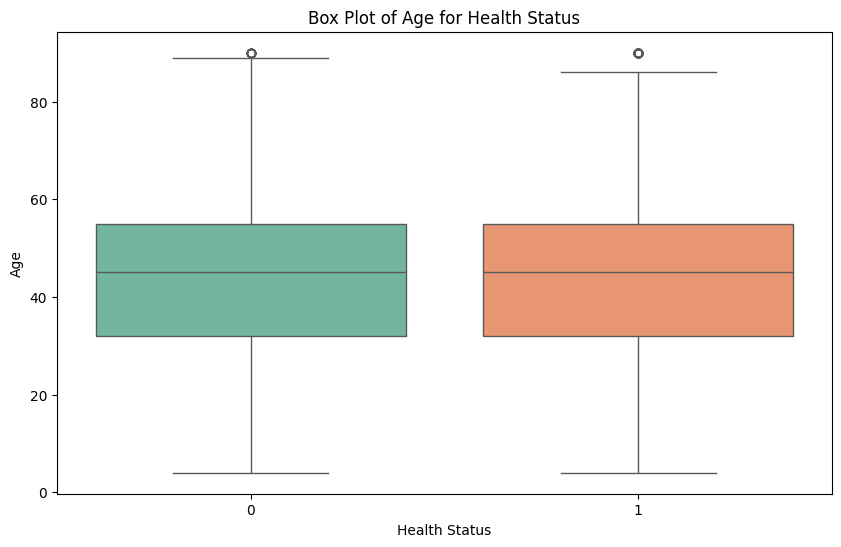

In [25]:
# Box plot of age distribution for each health status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age of the patient', data=merge_clean_data, palette='Set2')
plt.title('Box Plot of Age for Health Status')
plt.xlabel('Health Status')
plt.ylabel('Age')
plt.show()

Also from the box plot we can infer as this indipendence becaouse the distribution follows a normal curve

# Any relationship between diff factor 

Status                                  1.000000
Direct Bilirubin                        0.248788
Alkphos Alkaline Phosphotase            0.181248
Sgpt Alamine Aminotransferase           0.164754
ALB Albumin                             0.159880
Sgot Aspartate Aminotransferase         0.157600
A/G Ratio Albumin and Globulin Ratio    0.157516
Total Protiens                          0.030247
Age of the patient                      0.003524
Name: Status, dtype: float64

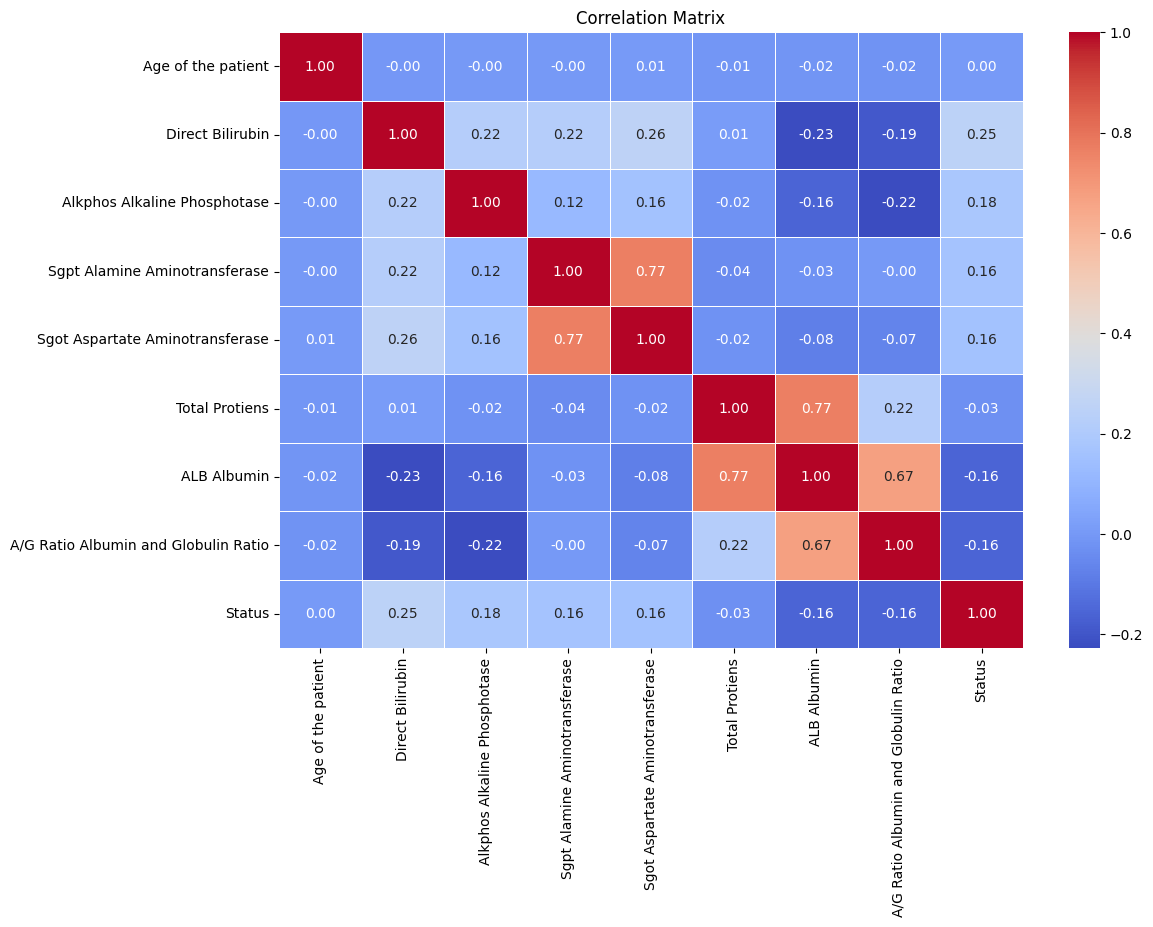

In [26]:
correlation_matrix = merge_clean_data.corr(method='pearson',numeric_only=True)
liver_d_corr = correlation_matrix["Status"].abs().sort_values(ascending=False)

print(liver_d_corr)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True , cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
correlation_matrix = merge_data[["Age of the patient","Status"]].corr(method='pearson',numeric_only=True)
liver_d_corr_with_age = correlation_matrix["Status"].sort_values(ascending=False)
print(liver_d_corr_with_age)
print("\nAny affect of age group on the occurrence of liver disease?", liver_d_corr_with_age["Age of the patient"]>0.1)

Status                1.000000
Age of the patient    0.004812
Name: Status, dtype: float64

Any affect of age group on the occurrence of liver disease? False

## is there any corelation between Gender of the patient and presence of liver disease

In [28]:
CrosstabResult=pd.crosstab(index=merge_clean_data['Gender of the patient'],columns=merge_data['Status'])
print(CrosstabResult) 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value < 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(ChiSqResult[1]<0.05)

Status                    0      1
Gender of the patient             
0                      6101  15304
1                      2210   5468
not_mentioned           259    587

The P-Value of the ChiSq Test is: 0.38892694125274224

False

## is there any corelation between state of the patient and presence of liver disease

In [29]:
CrosstabResult=pd.crosstab(index=merge_clean_data['State Name'],columns=merge_data['Status'])
print(CrosstabResult) 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value < 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
print(ChiSqResult[1]<0.05)

Status            0     1
State Name               
Andhra Pradesh  295   778
Bihar           283   685
Delhi           350   848
Gujarat         849  2138
Jharkhand       594  1394
Karnataka       884  2272
Kerala          587  1492
Madhya Pradesh  265   713
Maharashtra     895  2220
Odisha          269   703
Punjab          272   669
Rajasthan       300   731
Sikkim          300   671
Tamil Nadu      963  2348
Telangana       267   716
Uttar Pradesh   594  1497
Uttarakhand     300   773
West Bengal     303   711

The P-Value of the ChiSq Test is: 0.9042827892589764

False